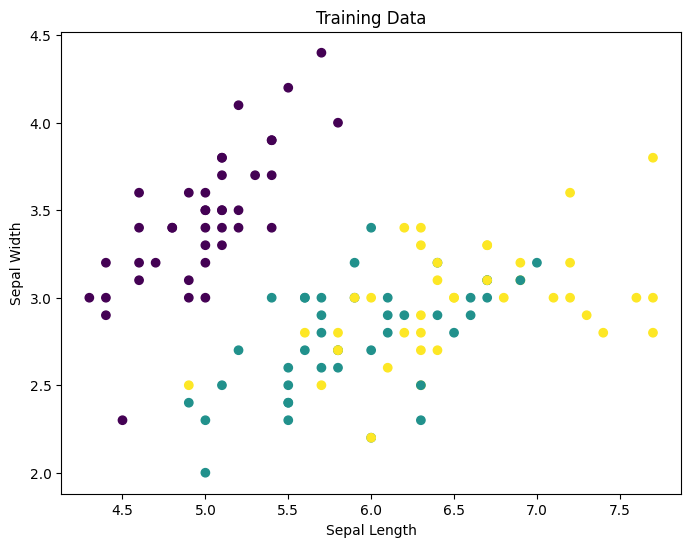

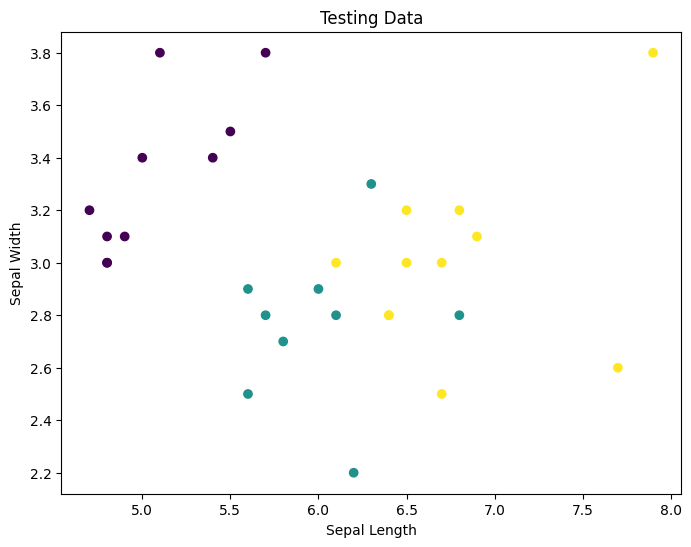

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



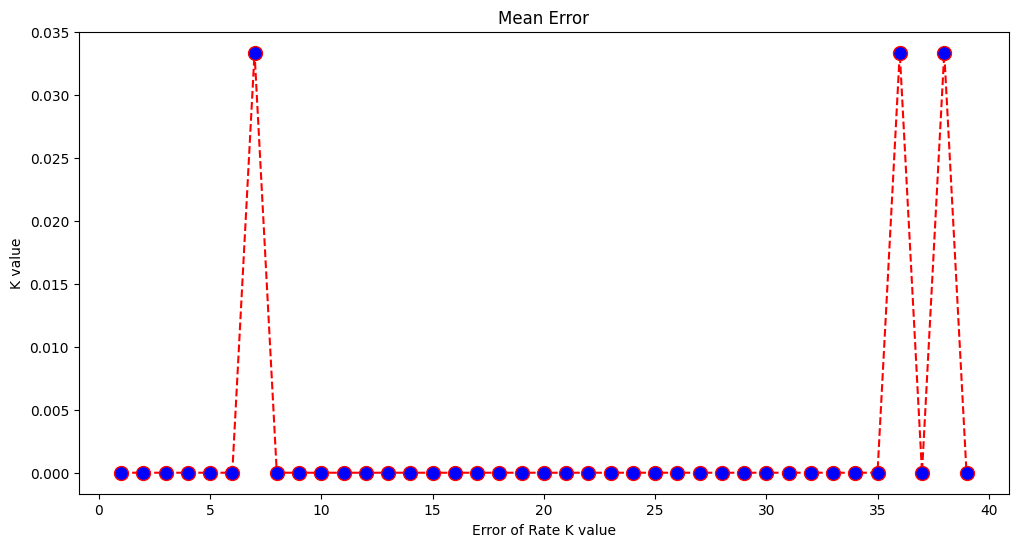

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

# Split the dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Visualize the training data using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Training Data')
plt.show()

# Visualize the testing data using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Testing Data')
plt.show()

# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# K-Nearest Neighbors
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

# Plotting the KNN error
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue',markersize=10)

plt.xlabel('Error of Rate K value')
plt.ylabel('K value')
plt.title('Mean Error')
plt.show()